# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print('Done')

Done


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"
response = requests.get(url)
response

<Response [200]>

In [8]:
## Worked with Cristian Anderson on this portion
city_data = []
cloudy = []
country = []
date = []
hum = []
lati = []
longi = []
max_temp = []
wind = []
count = 1

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {iindex} of {len(cities)} | {city}")
        city_data.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["sys"]["sunrise"])
        hum.append(response["main"]["humidity"])
        lati.append(response["coord"]["lat"])
        longi.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        count = count + 1
    except:
        print('city not found')
    iindex = iindex + 1

Processing Record 1 of 626 | saint-philippe
Processing Record 3 of 626 | ushuaia
Processing Record 5 of 626 | norman wells
Processing Record 7 of 626 | maniitsoq
Processing Record 9 of 626 | saint-pierre
Processing Record 11 of 626 | taolanaro
city not found
Processing Record 12 of 626 | saldanha
Processing Record 14 of 626 | nikolskoye
Processing Record 16 of 626 | khatanga
Processing Record 18 of 626 | hasaki
Processing Record 20 of 626 | mnogovershinnyy
Processing Record 22 of 626 | vaini
Processing Record 24 of 626 | atuona
Processing Record 26 of 626 | tsentralnyy
city not found
Processing Record 27 of 626 | bluff
Processing Record 29 of 626 | kadykchan
city not found
Processing Record 30 of 626 | sterlibashevo
Processing Record 32 of 626 | san jose
Processing Record 34 of 626 | kodiak
Processing Record 36 of 626 | upernavik
Processing Record 38 of 626 | georgetown
Processing Record 40 of 626 | faanui
Processing Record 42 of 626 | santiago
Processing Record 44 of 626 | kapaa
Proce

Processing Record 384 of 626 | nanortalik
Processing Record 386 of 626 | shimoda
Processing Record 388 of 626 | college
Processing Record 390 of 626 | umzimvubu
city not found
Processing Record 391 of 626 | paraiso
Processing Record 393 of 626 | loukhi
Processing Record 395 of 626 | belushya guba
city not found
Processing Record 396 of 626 | hay river
Processing Record 398 of 626 | tieling
Processing Record 400 of 626 | shar
Processing Record 402 of 626 | makakilo city
Processing Record 404 of 626 | jurado
Processing Record 406 of 626 | marcona
city not found
Processing Record 407 of 626 | ponta do sol
Processing Record 409 of 626 | pacific grove
Processing Record 411 of 626 | cabedelo
Processing Record 413 of 626 | kampot
Processing Record 415 of 626 | chapais
Processing Record 417 of 626 | muzaffarabad
Processing Record 419 of 626 | blackfoot
Processing Record 421 of 626 | inirida
Processing Record 423 of 626 | sentyabrskiy
city not found
Processing Record 424 of 626 | sao joao da ba

Processing Record 757 of 626 | san rafael
Processing Record 759 of 626 | bitung
Processing Record 761 of 626 | klaksvik
Processing Record 763 of 626 | toora-khem
Processing Record 765 of 626 | hami
Processing Record 767 of 626 | chapleau
Processing Record 769 of 626 | nuqui
Processing Record 771 of 626 | alberton
Processing Record 773 of 626 | salihorsk
Processing Record 775 of 626 | balkanabat
Processing Record 777 of 626 | isoka
Processing Record 779 of 626 | rio grande
Processing Record 781 of 626 | waterbury
Processing Record 783 of 626 | alta floresta
Processing Record 785 of 626 | ambovombe
Processing Record 787 of 626 | quixada
Processing Record 789 of 626 | karaton
Processing Record 791 of 626 | trairi
Processing Record 793 of 626 | iranshahr
Processing Record 795 of 626 | warrenton
Processing Record 797 of 626 | grand forks
Processing Record 799 of 626 | pau brasil
Processing Record 801 of 626 | lebu
Processing Record 803 of 626 | conneaut
Processing Record 805 of 626 | kerteh

Processing Record 1130 of 626 | batticaloa
Processing Record 1132 of 626 | gwanda
Processing Record 1134 of 626 | kenai
Processing Record 1136 of 626 | tortel
Processing Record 1138 of 626 | ardmore
Processing Record 1140 of 626 | anori
Processing Record 1142 of 626 | la reforma
Processing Record 1144 of 626 | naco
Processing Record 1146 of 626 | konevo
Processing Record 1148 of 626 | mountain home
Processing Record 1150 of 626 | bagan
Processing Record 1152 of 626 | mizan teferi
Processing Record 1154 of 626 | tumaco
Processing Record 1156 of 626 | chokwe
Processing Record 1158 of 626 | camargo
Processing Record 1160 of 626 | bengkalis
city not found
Processing Record 1161 of 626 | wanning
Processing Record 1163 of 626 | matay
Processing Record 1165 of 626 | talaja
Processing Record 1167 of 626 | bintulu
Processing Record 1169 of 626 | bubaque
Processing Record 1171 of 626 | strichen
Processing Record 1173 of 626 | shingu
Processing Record 1175 of 626 | caxito
Processing Record 1177 o

In [11]:
weather_dictionary = {
     "City": citydata,
    "Cloud Cover": cloud,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": latitude,
    "Longitude": longitude,
    "Maximum Temperature": max_temp,
    "Wind Speed (MPH)": wind
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data = pd.DataFrame(weather_dictionary)
weather_data.count()
weather_data.to_csv("cities.csv")
weather_data.head()

,City,Cloud Cover,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed (MPH)
0,Saint-Philippe,75,RE,1594954429,68,-21.36,55.77,293.15,3.10
1,Ushuaia,0,AR,1594903538,89,-54.80,-68.30,273.15,1.50
2,Norman Wells,90,CA,1594895173,82,65.28,-126.83,290.15,4.60
3,Maniitsoq,7,GL,1594877217,82,65.42,-52.90,281.28,3.75
4,Saint-Pierre,75,RE,1594954496,68,-21.34,55.48,293.15,3.10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_data.loc[weather_data['Humidity'] > 100]
# This returns no cities with humidity exceeding 100%
# Perhaps we have avoided the Amazon rainforest :)
# As such this portion will be skipped

,City,Cloud Cover,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed (MPH)


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

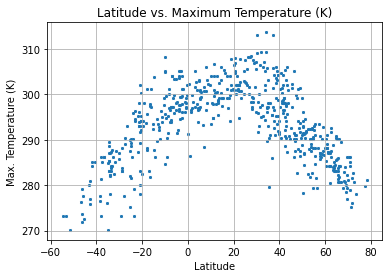

In [20]:
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Maximum Temperature"], marker="x", s=5)

# Asthetics
plt.title("Latitude vs. Maximum Temperature (K)")
plt.ylabel("Max. Temperature (K)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

## Latitude vs. Humidity Plot

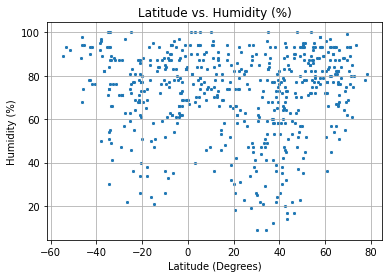

In [22]:
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Humidity"], marker="x", s=5)

# Asthetics
plt.title("Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

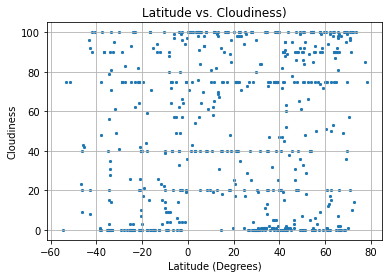

In [24]:
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Cloud Cover"], marker="x", s=5)

# Asthetics
plt.title("Latitude vs. Cloudiness)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

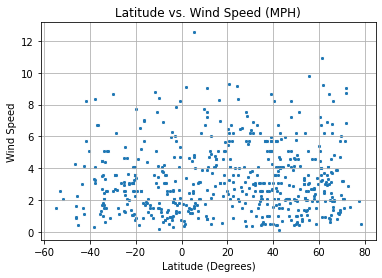

In [25]:
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Wind Speed (MPH)"], marker="x", s=5)

# Asthetics
plt.title("Latitude vs. Wind Speed (MPH)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression